In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [108]:
shopping_df= pd.read_csv("test.csv")
test_df= pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

In [109]:

plt.rcParams['figure.figsize']=(12,6)

In [110]:
shopping_df.head()
shopping_df.shape
shopping_df.info()
shopping_df.describe()

train_df.shape
train_df.head()
test_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [111]:
shopping_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

<Axes: >

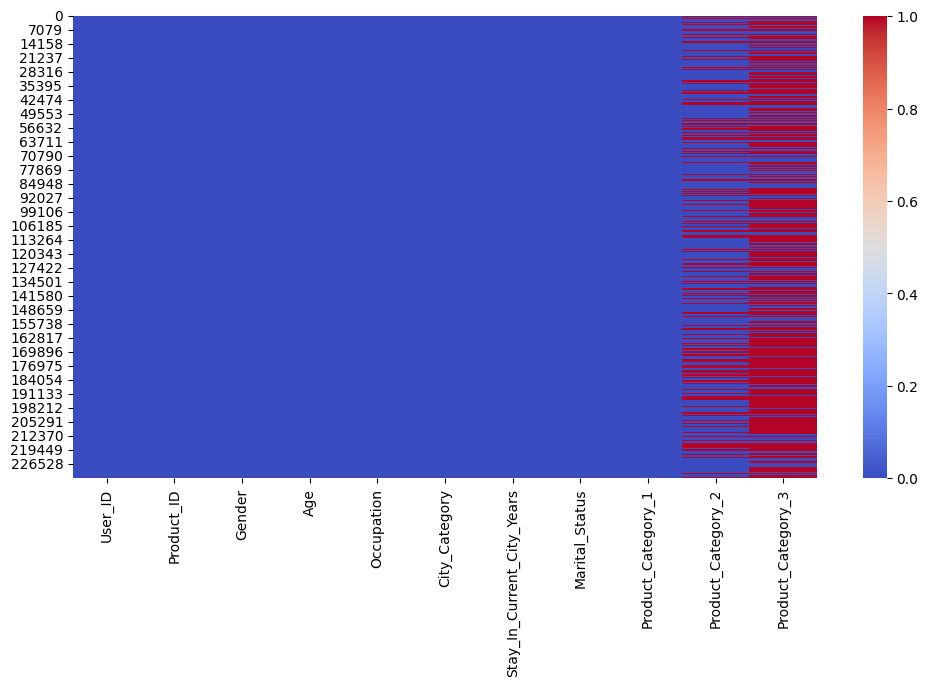

In [112]:
sns.heatmap(shopping_df.isnull(),cmap="coolwarm")


In [113]:
shopping_df.isnull().sum().sum()


234906

In [114]:
shopping_num_df =shopping_df.select_dtypes(include=[int,float])
shopping_num_df.shape

(233599, 6)

In [115]:
shopping_num_df = shopping_num_df.select_dtypes(include=[float, int])
shopping_cat_df = shopping_num_df.select_dtypes(exclude=[float, int])
shopping_cat_df.shape
shopping_df.shape

(233599, 11)

In [116]:
## concat, append, merge
final_df = pd.concat([test_df,train_df],axis=0)

In [117]:
final_df.shape
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN


In [118]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [119]:
# Convert categorical into muerical\

final_df['Gender']=final_df['Gender'].map({'F':0,'M':1})

In [120]:
final_df['Age'].unique()

array(['46-50', '26-35', '36-45', '18-25', '51-55', '55+', '0-17'],
      dtype=object)

In [121]:
final_df['Age']=final_df['Age'].map({'46-50':4, '26-35':2, '36-45':3, '18-25':1, '51-55':6, '55+':5, '0-17':0})

In [122]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00128942,1,4,7,B,2,1,1,11.0,NaN,NaN
1,P00113442,1,2,17,C,0,0,3,5.0,NaN,NaN
2,P00288442,0,3,1,B,4+,1,5,14.0,NaN,NaN
3,P00145342,0,3,1,B,4+,1,4,9.0,NaN,NaN
4,P00053842,0,2,1,C,1,0,4,5.0,12.0,NaN


In [123]:
city_df= pd.get_dummies(final_df['City_Category'],drop_first =True).astype(int)

In [124]:
city_df.head()

,B,C
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1


In [125]:
final_df= pd.concat([final_df,city_df],axis=1)

In [126]:
final_df.drop(['City_Category'],axis=1,inplace= True)

In [127]:
final_df[:50]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1
5,P00350442,1,4,1,3,1,2,3.0,15.0,NaN,0,1
6,P00155442,1,4,1,3,1,1,11.0,15.0,NaN,0,1
7,P0094542,1,4,1,3,1,2,4.0,9.0,NaN,0,1
8,P00161842,1,2,7,1,0,10,13.0,16.0,NaN,0,0
9,P00067942,1,1,15,4+,0,5,14.0,NaN,NaN,0,0


In [128]:
#missing calue 
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

<Axes: >

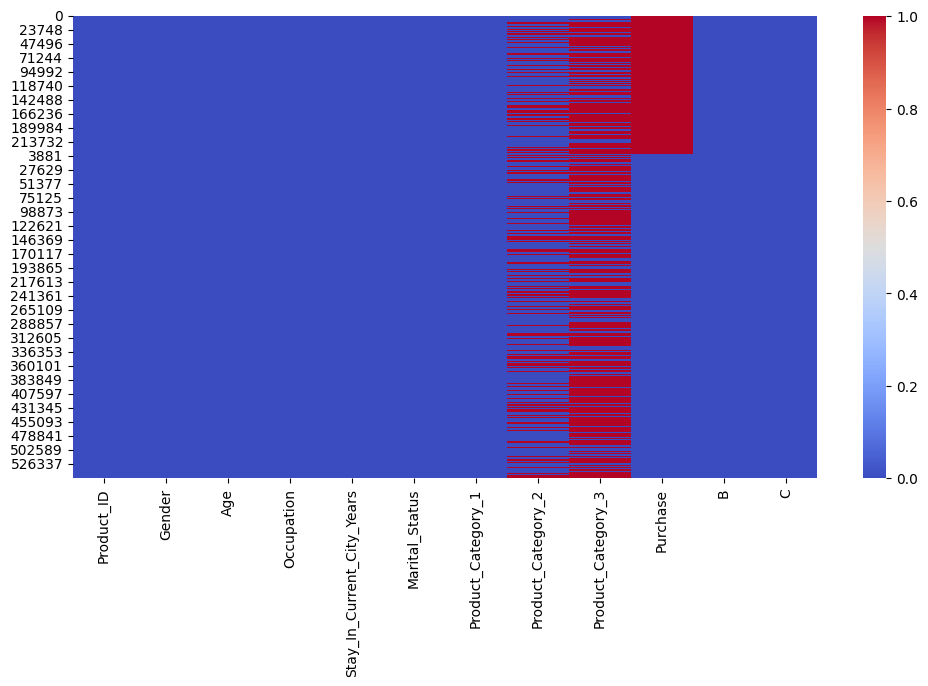

In [129]:
sns.heatmap(final_df.isnull(),cmap='coolwarm')

In [130]:
final_df['Product_Category_2']

0         11.0
1          5.0
2         14.0
3          9.0
4          5.0
          ... 
550063     NaN
550064     NaN
550065     NaN
550066     NaN
550067     NaN
Name: Product_Category_2, Length: 783667, dtype: float64

In [131]:
#final_df['Product_Category_2']= final_df['Product_Category_2'].apply(lambda col: col.fillna(col.mode()[0]))

final_df['Product_Category_2']=final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [132]:
final_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,NaN,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,NaN,NaN,0,1
2,P00288442,0,3,1,4+,1,5,14.0,NaN,NaN,1,0
3,P00145342,0,3,1,4+,1,4,9.0,NaN,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1


In [133]:
final_df['Product_Category_3']=final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [134]:
final_df['Stay_In_Current_City_Years'].value_counts()

Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: count, dtype: int64

In [135]:
final_df['Stay_In_Current_City_Years'].unique()


array(['2', '0', '4+', '1', '3'], dtype=object)

In [136]:
#final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].map({'2':2, '0':0, '4+':4, '1':1, '3':3})

In [137]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '0', '4+', '1', '3'], dtype=object)

In [138]:
final_df['Stay_In_Current_City_Years']=final_df['Stay_In_Current_City_Years'].map({'2':2, '0':0, '4+':4, '1':1, '3':3})

In [139]:
final_df['Stay_In_Current_City_Years'].unique()

array([2, 0, 4, 1, 3])

In [140]:
final_df['Stay_In_Current_City_Years'].info()

<class 'pandas.core.series.Series'>
Index: 783667 entries, 0 to 550067
Series name: Stay_In_Current_City_Years
Non-Null Count   Dtype
--------------   -----
783667 non-null  int64
dtypes: int64(1)
memory usage: 12.0 MB


In [141]:
final_df['Stay_In_Current_City_Years']= final_df['Stay_In_Current_City_Years'].astype(int)

In [143]:
final_df['B']= final_df['B'].astype(int)
final_df['C']= final_df['C'].astype(int)

In [149]:
final_df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Age', ylabel='Purchase'>

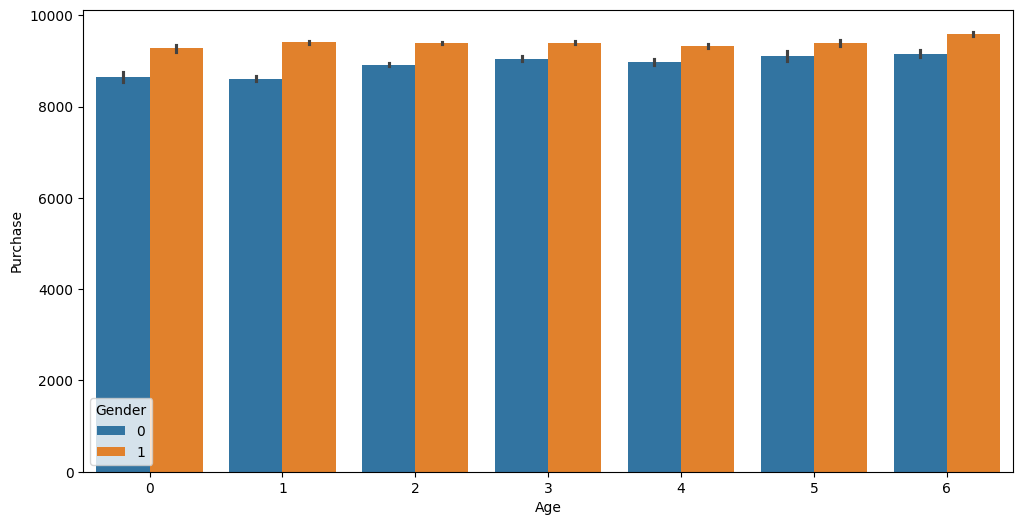

In [153]:
sns.barplot(x='Age',y='Purchase',hue='Gender',data=final_df)